# TP Programmation avec Keras - Cas MNIST

Nous allons produire un réseau de neurones pour effectuer une classification sur le cas MNIST avec les bibliothèques keras/tensorflow. MNIST est une base de données composée d'images de chiffres.

Dans ce TP, des cellules seront laissées à trous, il faudra les compléter suivant les consignes. Elles seront identifiées par le mot **Exercice**. Les **Vérifications** seront effectuées principalement par vous-mêmes, sur la bonne convergence des algorithmes ou leur bon fonctionnement.

Ci-dessous, on importe les bibliothèques qui seront utiles.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

## Mise en place des données

Le code ci-dessous charge les données MNIST.

In [3]:
#NE PAS MODIFIER

(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

**Exercice** : Avec plt.imshow, regardez à quoi ressemble les données de X_train.

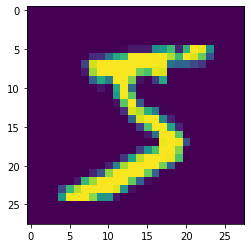

In [4]:
#A COMPLETER

**Vérification** : Des images de chiffres doivent apparaître.

**Exercice** : Regardez les dimensions des données d'entrée, celle des données de sortie. Affichez aussi sous forme d'un tableau les données d'entrées du premier exemples ainsi que les 15 premières données de sortie.

In [7]:
#A COMPLETER

(60000, 28, 28)
(60000,)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0  

### Mise en forme des données d'entrée

**Exercice** : Vous constatez que les données d'entrée sont composées de tableaux de nombres compris entre 0 et 255. Ce sont des nombres relativement grand pour un réseau de neurones, qui peuvent créer des instabilités numériques lors des calculs des gradients. Pour éviter ces instabilités numériques, il convient d'avoir des nombres de l'ordre de l'unité.
Pour ce faire, on va simplement normaliser les données en les divisant par 255, valeur maximale des pixels. Faites-le ci-dessous pour X_train et X_test.

In [8]:
X_train = #A COMPLETER

X_test = #A COMPLETER

### Mise en forme des données de sortie

**Exercice** : Vous constaterez aussi que les données de sortie correspondent au chiffre de l'image (nombre en 0 et 9). Pour effectuer une classification, il faut en fait des classes binaires, dont la valeur est 0 ou 1, avec le nombre de classes attendu. Par exemple, le chiffre 5 sera encodé par le vecteur [0,0,0,0,0,1,0,0,0,0].

Pour ce faire, vous pouvez utiliser la fonction de keras keras.utils.to_categorical, en indiquant le vecteur à traiter, ainsi que le nombre de classes avec le mot-clé num-classes. Faites-le pour Y_train et Y_test.

In [9]:
Y_train_cat = #A COMPLETER

Y_test_cat = #A COMPLETER

## Modèle Keras

### Création du modèle

**Exercice** : Créez un modèle avec Keras que vous appellerez "my_model".

**Instructions spécifiques** : 
- La première couche doit être Flatten avec un input_shape qui correspond à la dimension des données d'entrée. Cette couche permet seulement d'applatir les données en un vecteur : un réseau de type Multilayer Perceptron s'applique en effet à des vecteurs. Il n'y a pas besoin de préciser d'autre variable que les dimensions d'entrée.
- On effectue une classification exclusive, il n'y a qu'un seul chiffre affiché : la dernière couche doit faire intervenir la fonction softmax. Mettez aussi le bon nombre de neurones en sortie.
- Pour le reste, mettez 2 ou 3 couches intermédiaires, une centaine de neurones, une fonction d'activation relu. Vous êtes assez libres !

In [ ]:
#A COMPLETER

**Exercice** : Affichez la structure de votre modèle avec my_model.summary()

In [11]:
#A COMPLETER

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


**Vérification** : Pour l'instant, il suffit qu'il n'y ait pas d'erreur.

### Compilation du modèle

**Exercice** : Compilez le modèle avec l'optimizer que vous souhaitez.

**Instructions spécifiques** :
- Pour la loss function, nous faisons une classification exclusive, la "categorical_crossentropy" pourra être utilisée comme loss function.
- Pour la métrique, ce sera "categorical_accuracy"

In [15]:
#A COMPLETER

**Vérification** : De nouveau, s'il n'y a pas d'erreur et que vous avez suivi les instructions, tout devrait bien se passer.

## L'apprentissage

**Exercice** : Il faut maintenant effectuer l'apprentissage. Attention à bien utiliser Y_train_cat comme donnée de sortie. Stockez l'historique de votre entraînement dans une variable pour pouvoir ensuite afficher l'évolution de la fonction de coût et de l'accuracy.

In [16]:
#A COMPLETER

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2989 - categorical_accuracy: 0.9173
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1868 - categorical_accuracy: 0.9517
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1769 - categorical_accuracy: 0.9571
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1701 - categorical_accuracy: 0.9605
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1416 - categorical_accuracy: 0.9661
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1326 - categorical_accuracy: 0.9689
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1296 - categorical_accuracy: 0.9703
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1076 - categorical_accuracy: 0.9758
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1

**Vérification** : La loss function devrait diminuer et l'accuracy augmenter.

**Exercice** : Tracez l'évolution de la fonction de coût et de l'accuracy.

Text(0.5, 1.0, 'Categorical accuracy evolution')

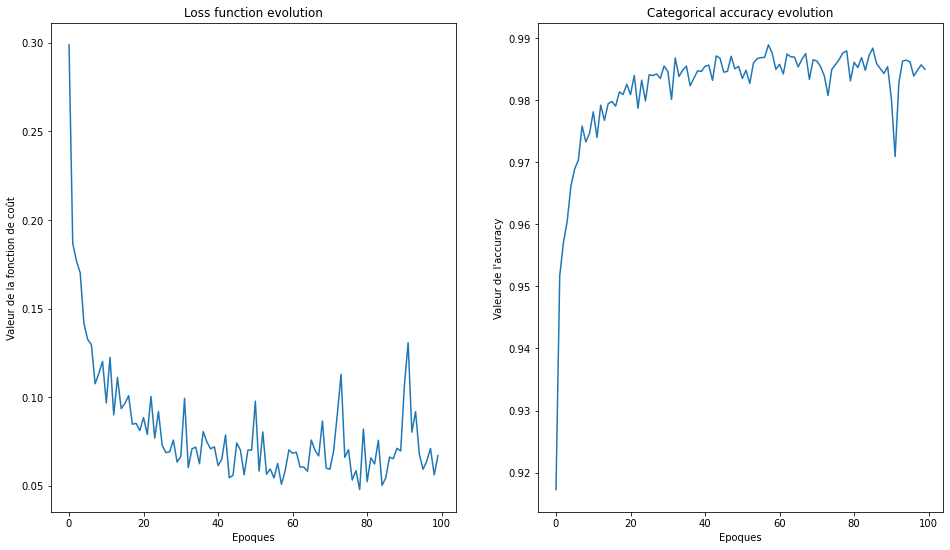

In [19]:
#A COMPLETER

## Prédictions avec le modèle

**Exercice** : Effectuez la prédiction sur le jeu de test.

In [20]:
#A COMPLETER

**Exercice** : Extrayez les labels prédits par votre réseau, qui correspondent aux classes avec la plus grande probabilité. La fonction np.argmax vous sera utile, à appliquer sur le bon "axis".

In [21]:
#A COMPLETER

**Exercice** : Calculez l'accuracy sur le jeu de test.

In [22]:
#A COMPLETER

0.9644

Le code ci-dessous vous permet de visualiser quelques résultats pris au hasard sur la base de test.

Text(0, 0.5, 'Output du réseau')

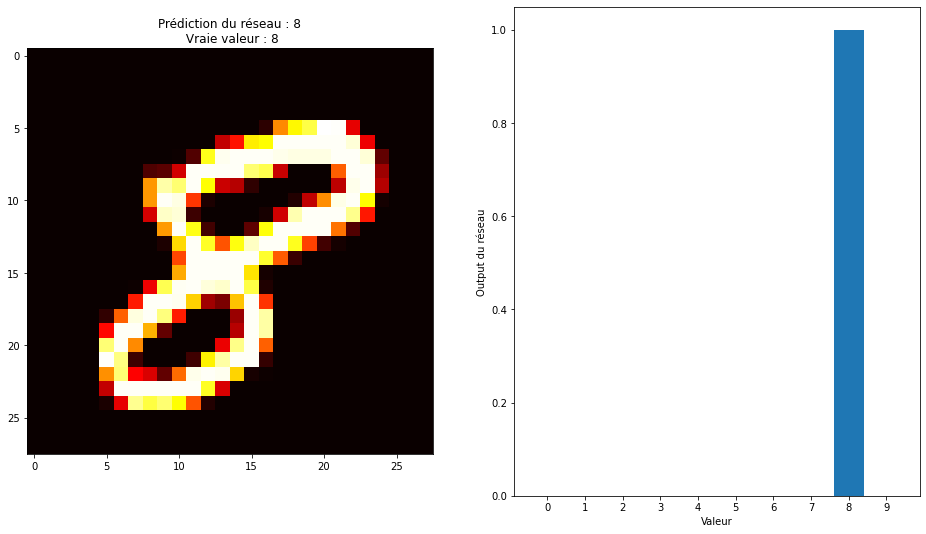

In [25]:
r = np.random.randint(X_test.shape[0])

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[r,:,:],cmap = "hot")
plt.title("Prédiction du réseau : " + str(Y_test_pred_lab[r]) + "\n Vraie valeur : " + str(Y_test[r]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_pred_test[r],tick_label = np.arange(10))
plt.xlabel("Valeur")
plt.ylabel("Output du réseau")


**Exercice** : Réutilisez le code d'affichage ci-dessus, mais pour afficher aléatoirement des erreurs. La fonction np.where vous sera utile pour localiser les erreurs.

In [ ]:
#A COMPLETER